In [1]:
%pip install requests 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
from bs4 import BeautifulSoup

url = 'https://mitmachen.siegburg.de/angebotslandkarte'

response = requests.get(url)

links = []

if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')
    
    a_tags = soup.find_all('a')

    for tag in a_tags:
        href = tag.get('href')
        
        if href and '/proposals/' in href and not 'new' in href:
            link = 'https://mitmachen.siegburg.de' + href
    
            if not link in links:
                links.append(link)
    
else:
    print("Failed to retrieve the webpage. Status code:", response.status_code)


In [3]:
import pandas as pd

In [4]:
link_and_data = {}

for link in links:
    response = requests.get(link)

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')

        divs = soup.find_all('div', class_='flex-layout')
        content = divs[1]

        text_content = content.get_text(strip=True)

        link_and_data[link] = text_content
        
    else:
        message = "Failed to retrieve the webpage. Status code:", response.status_code
        link_and_data[link] = message

print(link_and_data)

{'https://mitmachen.siegburg.de/proposals/1090-senioiren-cafe-lichtblick-kaldauen': 'Senioiren Cafe Lichtblick Kaldauen18. September 20240 KommentareZugehöriges Projekt:\n            Angebotslandkarte60-7475+Geselliges BeisammenseinDas Cafe Lichtblick in Kaldauen lädt alle Senioren zum geselligen Beisammensein bei Kaffee und Kuchen ein. Es wird gesungen, gespielt, getanzt, gelacht und viel erzählt. Auch gemeinsame Ausflüge und Feiern stehen auf dem Programm.Haben Sie Interesse, dann kommen Sie gerne vorbei. Die Senioren und das Team freut sich auf Sie!Treffen : Alle 14 Tage Dienstags von 15.00 - 17.00 Uhr\xa0(immer in geraden Wochen)Ort : Pfarrheim der katholischen Kirche KaldauenAntoniusweg 1 ;\xa053721 SiegburgAnmeldungen bei Rita Quadt ; Tel.:\xa0015733725174:Kommentare(0)Um fortzufahren, müssen Sie sichanmeldenoderregistrieren.MCafé LichtblickBeigetreten am: 18.09.2024Konto verifiziertVorschläge1Unterstützer*innenUnterstützer*innenUnterstützung0 Unterstützer*innenUm fortzufahren, m

In [5]:
# Convert the dictionary to a DataFrame
df = pd.DataFrame(list(link_and_data.items()), columns=['URL', 'Content'])

df['URL'][:5]

0    https://mitmachen.siegburg.de/proposals/1090-s...
1    https://mitmachen.siegburg.de/proposals/1089-d...
2    https://mitmachen.siegburg.de/proposals/1087-g...
3    https://mitmachen.siegburg.de/proposals/1056-g...
4    https://mitmachen.siegburg.de/proposals/1055-b...
Name: URL, dtype: object

In [6]:
df.shape

(24, 2)

In [7]:
# Display the resulting DataFrame to the user
df['Content'][0]

'Senioiren Cafe Lichtblick Kaldauen18. September 20240 KommentareZugehöriges Projekt:\n            Angebotslandkarte60-7475+Geselliges BeisammenseinDas Cafe Lichtblick in Kaldauen lädt alle Senioren zum geselligen Beisammensein bei Kaffee und Kuchen ein. Es wird gesungen, gespielt, getanzt, gelacht und viel erzählt. Auch gemeinsame Ausflüge und Feiern stehen auf dem Programm.Haben Sie Interesse, dann kommen Sie gerne vorbei. Die Senioren und das Team freut sich auf Sie!Treffen : Alle 14 Tage Dienstags von 15.00 - 17.00 Uhr\xa0(immer in geraden Wochen)Ort : Pfarrheim der katholischen Kirche KaldauenAntoniusweg 1 ;\xa053721 SiegburgAnmeldungen bei Rita Quadt ; Tel.:\xa0015733725174:Kommentare(0)Um fortzufahren, müssen Sie sichanmeldenoderregistrieren.MCafé LichtblickBeigetreten am: 18.09.2024Konto verifiziertVorschläge1Unterstützer*innenUnterstützer*innenUnterstützung0 Unterstützer*innenUm fortzufahren, müssen Sie sichanmeldenoderregistrieren.TeilenTeilenwhatsapp'

In [8]:
df['Content'][0]

'Senioiren Cafe Lichtblick Kaldauen18. September 20240 KommentareZugehöriges Projekt:\n            Angebotslandkarte60-7475+Geselliges BeisammenseinDas Cafe Lichtblick in Kaldauen lädt alle Senioren zum geselligen Beisammensein bei Kaffee und Kuchen ein. Es wird gesungen, gespielt, getanzt, gelacht und viel erzählt. Auch gemeinsame Ausflüge und Feiern stehen auf dem Programm.Haben Sie Interesse, dann kommen Sie gerne vorbei. Die Senioren und das Team freut sich auf Sie!Treffen : Alle 14 Tage Dienstags von 15.00 - 17.00 Uhr\xa0(immer in geraden Wochen)Ort : Pfarrheim der katholischen Kirche KaldauenAntoniusweg 1 ;\xa053721 SiegburgAnmeldungen bei Rita Quadt ; Tel.:\xa0015733725174:Kommentare(0)Um fortzufahren, müssen Sie sichanmeldenoderregistrieren.MCafé LichtblickBeigetreten am: 18.09.2024Konto verifiziertVorschläge1Unterstützer*innenUnterstützer*innenUnterstützung0 Unterstützer*innenUm fortzufahren, müssen Sie sichanmeldenoderregistrieren.TeilenTeilenwhatsapp'

In [9]:
import re

# Enhanced function to extract all logical parts, including "Unterstützer*innen"
def extract_full_data_with_supporters(content):
    # Extract title (everything before the first date)
    title_match = re.search(r'^(.*?)(\r|\d{1,2}\.\s\w+\s\d{4})', content)
    title = title_match.group(1).strip() if title_match else None

    # Extract date
    date_match = re.search(r'\d{1,2}\.\s\w+\s\d{4}', content)
    date = date_match.group(0) if date_match else None

    # Extract comments count
    comments_match = re.search(r'(\d+)\sKommentare', content)
    comments = int(comments_match.group(1)) if comments_match else 0

    # Extract tags (sections with numbers or + signs)
    tags_match = re.findall(r'(\d{1,2}[-+]\d{1,2}|\d{2}\+)', content)
    tags = ', '.join(tags_match) if tags_match else None

    # Extract description (everything after "Geselliges Beisammensein" or similar patterns)
    description_start = re.search(r'(Geselliges Beisammensein|Angebotslandkarte)', content)
    description = content[description_start.start():].strip() if description_start else None

    # Extract username
    username_match = re.search(r'(\w+\s\w+|Beigetreten am:.*?\d{4})', content)
    username = username_match.group(1).split('Beigetreten am:')[0].strip() if username_match else None

    # Extract Vorschläge count
    vorschlaege_match = re.search(r'Vorschläge(\d+)', content)
    vorschlaege = int(vorschlaege_match.group(1)) if vorschlaege_match else 0

    # Extract Konto verification status
    konto_match = re.search(r'(Konto\s(verifiziert|ist nicht verifiziert))', content)
    konto_status = konto_match.group(2) if konto_match else None

    # # Extract registration date
    # registration_match = re.search(r'Beigetreten am:\s(\d{1,2}\.\s\w+\s\d{4})', content)
    # registration_date = registration_match.group(1) if registration_match else None

    # Extract number of Unterstützer*innen
    supporters_match = re.search(r'(\d+)\sUnterstützer\*in', content)
    supporters = int(supporters_match.group(1)) if supporters_match else 0

    return title, date, comments, tags, description, username, vorschlaege, konto_status, supporters

# Apply the enhanced function to the DataFrame and create new columns
df[['Title', 'Date', 'Comments', 'Tags', 'Description', 'Username', 'Vorschläge', 'Konto Status', 'Supporters']] = df['Content'].apply(
    lambda x: pd.Series(extract_full_data_with_supporters(x))
)


In [10]:
df['Comments'].replace(20240, 0, inplace=True)

C:\Users\Rusel\AppData\Local\Temp\ipykernel_9260\2378994937.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Comments'].replace(20240, 0, inplace=True)


In [11]:
df['Content'][3]

'Geselliges Beisammensein in Braschoß18. August 20240 KommentareZugehöriges Projekt:\n            Angebotslandkarte18-2425-4950-5960-7475+Geselliges BeisammenseinDer "Pfarrverein Braschoß" lädt regelmäßig zum geselligen Beisammensein nach Braschoß ein:- Skatabende- Leseabende- Spielabend- ...Konkrete Veranstaltungen werden unterhttps://www.pfarrverein-braschoss.de/aktuelles.htmlveröffentlicht.Gerne informieren wir Sie per Mail über neue Veranstaltungen:https://www.pfarrverein-braschoss.de/newsletter.htmlAlle interessierte Bürger:innen\xa0 sind herzlich willkommen. In der Veranstaltungsübersicht ist vermerkt, wenn vorab eine Anmeldung erforderlich ist.Die Veranstaltungen finden in 53721 Siegburg-Braschoß, Braschosser Str. 50 statt.Kommentare(0)Um fortzufahren, müssen Sie sichanmeldenoderregistrieren.KEEBeigetreten am: 20.11.2022Konto verifiziertVorschläge3Unterstützer*innenUnterstützer*innenUnterstützung4 Unterstützer*innenUm fortzufahren, müssen Sie sichanmeldenoderregistrieren.Dokumen

In [12]:
df['URL'][3]

'https://mitmachen.siegburg.de/proposals/1056-geselliges-beisammensein-in-braschoss'

In [13]:
df['URL'][2]

'https://mitmachen.siegburg.de/proposals/1087-gemeinschaftsgarten-cecilienstrasse'

In [23]:
# Function to clean description considering keywords, numeric patterns, and refined starting logic
def clean_description_advanced(content):
    # Define keywords that mark the beginning of the description
    keywords = [
        'Geselliges Beisammensein', 'Natur', 'Hilfe & Beratung', 'Bildung', 
        'Musik', 'Bewegung', 'Glaube', 'Kulinarisches', 'Kunst & Kultur', 'Sonstiges',
    ]
    
    # Check for keywords first
    for keyword in keywords:
        if keyword in content:
            start_idx = content.find(keyword) + len(keyword)
            description = content[start_idx:].strip()
            description = re.split(r'(Kommentare\(.*?\)|registrieren)', description)[0].strip()
            return description

    # If no keyword is found, check for numeric patterns like "18-24, 25-49, etc."
    numeric_pattern = re.search(r'(\d{1,2}[-+]\d{1,2}|\d{2}\+)', content)
    if numeric_pattern:
        start_idx = numeric_pattern.end()
        description = content[start_idx:].strip()
        description = re.split(r'(Kommentare\(.*?\)|registrieren)', description)[0].strip()
        return description

    # As a fallback, find the first capital letter, quote, or digit to mark the start
    fallback_match = re.search(r'[A-Z"0-9]', content)
    if fallback_match:
        start_idx = fallback_match.start()
        description = content[start_idx:].strip()
        description = re.split(r'(Kommentare\(.*?\)|registrieren)', description)[0].strip()
        return description

    # If nothing works, return the content as is
    return content

# Apply the advanced cleaning function to the Description column
df['Description'] = df['Content'].apply(clean_description_advanced)
df['Date'] = pd.to_datetime(df['Date'], format='%d. %B %Y', errors='coerce')


In [24]:
df.head()

,URL,Content,Title,Date,Comments,Tags,Description,Username,Vorschläge,Konto Status,Supporters
0,https://mitmachen.siegburg.de/proposals/1090-s...,Senioiren Cafe Lichtblick Kaldauen18. Septembe...,Senioiren Cafe Lichtblick Kaldauen,2024-09-18,0,"60-74, 75+",Das Cafe Lichtblick in Kaldauen lädt alle Seni...,Senioiren Cafe,1,verifiziert,0
1,https://mitmachen.siegburg.de/proposals/1089-d...,Digitalsprechstunde für Senior*innen16. Septem...,Digitalsprechstunde für Senior*innen,2024-09-16,0,"60-74, 75+",Am ersten Donnerstag im Monat erhalten Seniori...,Digitalsprechstunde für,17,verifiziert,0
2,https://mitmachen.siegburg.de/proposals/1087-g...,Gemeinschaftsgarten Cecilienstraße12. Septembe...,Gemeinschaftsgarten Cecilienstraße,2024-09-12,0,"0-12, 13-17, 18-24, 25-49, 50-59, 60-74, 75+, ...",Der Gemeinschaftsgarten ist eine Kooperation d...,Gemeinschaftsgarten Cecilienstraße12,1,ist nicht verifiziert,0
3,https://mitmachen.siegburg.de/proposals/1056-g...,Geselliges Beisammensein in Braschoß18. August...,Geselliges Beisammensein in Braschoß,2024-08-18,0,"18-24, 25-49, 50-59, 60-74, 75+",in Braschoß18. August 20240 KommentareZugehöri...,Geselliges Beisammensein,3,verifiziert,4
4,https://mitmachen.siegburg.de/proposals/1055-b...,Bildungsveranstaltungen Pfarrverein Braschoß18...,Bildungsveranstaltungen Pfarrverein Braschoß,2024-08-18,0,"18-24, 25-49, 50-59, 60-74, 75+",sveranstaltungen Pfarrverein Braschoß18. Augus...,Bildungsveranstaltungen Pfarrverein,3,verifiziert,4


In [25]:
df.to_csv('siegburg_data.csv', index=False)

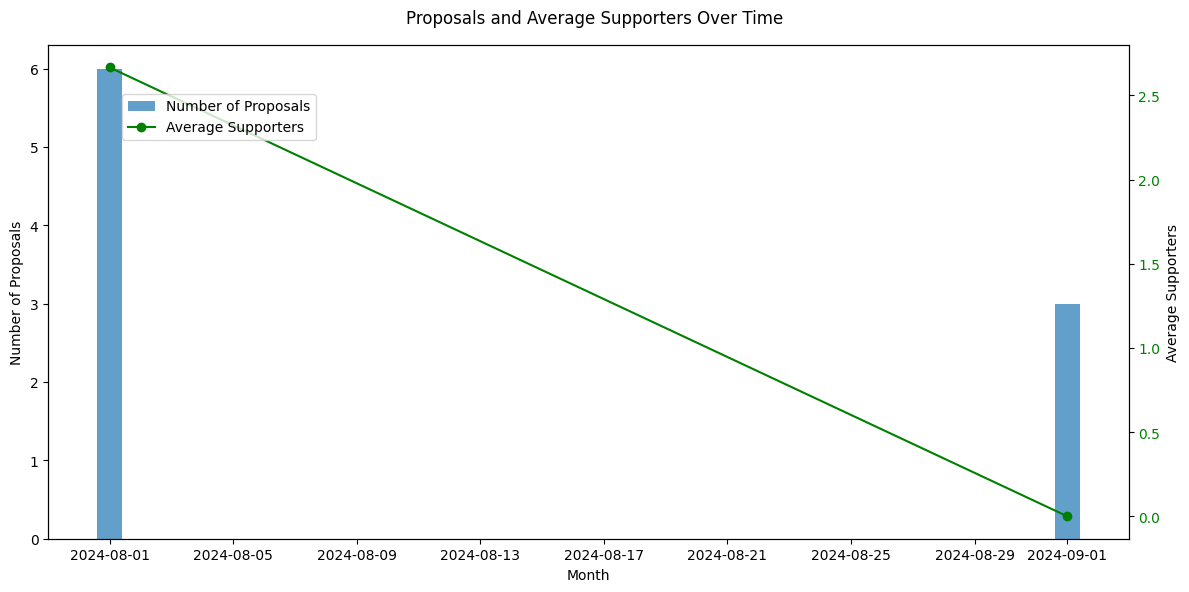

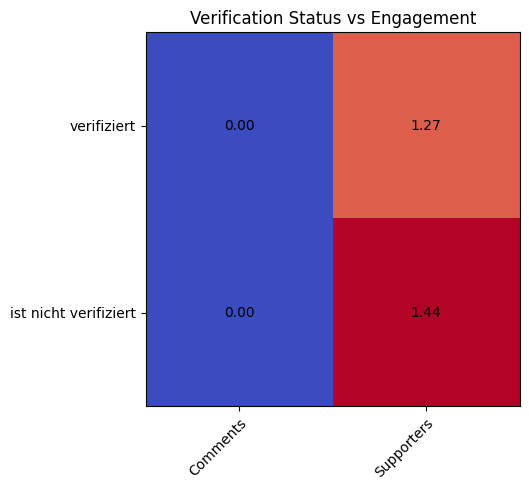

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# # 1. Bubble Chart: Supporters vs Comments Colored by Verification Status
# plt.figure(figsize=(10, 6))
# bubble_sizes = df["Supporters"] * 20  # Scale bubble size by supporters count
# colors = df["Konto Status"].apply(lambda x: 'blue' if x == "verifiziert" else 'red')
# plt.scatter(df["Comments"], df["Supporters"], s=bubble_sizes, c=colors, alpha=0.7, edgecolors="black")
# plt.title("Supporters vs Comments Colored by Verification Status")
# plt.xlabel("Number of Comments")
# plt.ylabel("Number of Supporters")
# plt.grid(alpha=0.3)
# plt.legend(["Verified (blue)", "Unverified (red)"], loc="upper right")
# plt.show()

# 2. Combined Bar and Line Chart: Proposals and Average Supporters Over Time
proposal_counts = df.groupby(df["Date"].dt.to_period("M")).size()
average_supporters = df.groupby(df["Date"].dt.to_period("M"))["Supporters"].mean()
months = proposal_counts.index.to_timestamp()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for proposals
ax1.bar(months, proposal_counts.values, alpha=0.7, label="Number of Proposals")
ax1.set_xlabel("Month")
ax1.set_ylabel("Number of Proposals")
ax1.tick_params(axis="y")

# Line chart for average supporters
ax2 = ax1.twinx()
ax2.plot(months, average_supporters.values, color="green", marker="o", label="Average Supporters")
ax2.set_ylabel("Average Supporters")
ax2.tick_params(axis="y", labelcolor="green")

fig.suptitle("Proposals and Average Supporters Over Time")
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.85))
fig.tight_layout()
plt.show()

# 3. Heatmap-Like Representation: Verification Status vs Engagement (Supporters & Comments)
engagement_matrix = df.pivot_table(
    values=["Supporters", "Comments"], 
    index="Konto Status", 
    aggfunc="mean"
)
engagement_matrix = engagement_matrix.reindex(["verifiziert", "ist nicht verifiziert"])

fig, ax = plt.subplots(figsize=(8, 5))
im = ax.imshow(engagement_matrix, cmap="coolwarm")

# Show all ticks and label them
ax.set_xticks(np.arange(len(engagement_matrix.columns)))
ax.set_yticks(np.arange(len(engagement_matrix.index)))
ax.set_xticklabels(engagement_matrix.columns)
ax.set_yticklabels(engagement_matrix.index)

# Rotate the tick labels and set alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Add text annotations
for i in range(len(engagement_matrix.index)):
    for j in range(len(engagement_matrix.columns)):
        text = ax.text(j, i, f"{engagement_matrix.iloc[i, j]:.2f}", ha="center", va="center", color="black")

ax.set_title("Verification Status vs Engagement")
fig.tight_layout()
plt.show()


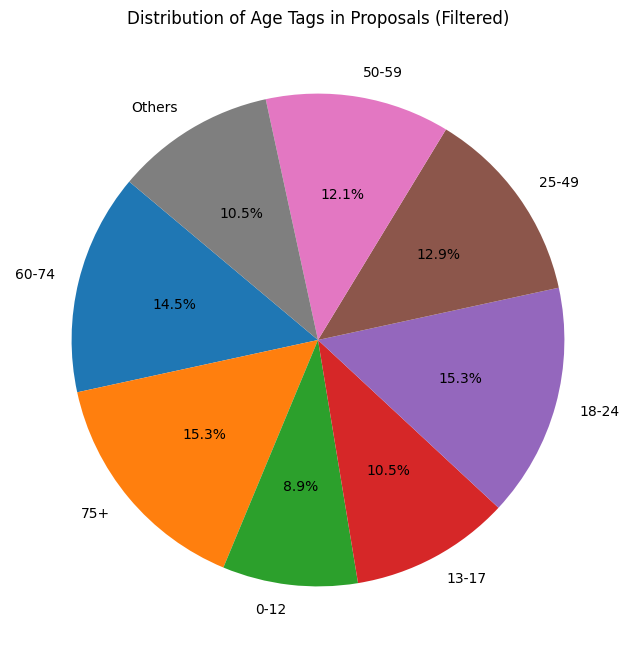

In [33]:
import matplotlib.pyplot as plt

# Process the 'Tags' column to extract age group information
from collections import Counter

# Split tags by commas and flatten into a single list
all_tags = df["Tags"].dropna().str.split(", ").sum()
tag_counts = Counter(all_tags)

# Filter tags with less than 5% contribution
total = sum(tag_counts.values())
filtered_tags = {tag: count for tag, count in tag_counts.items() if (count / total) * 100 >= 5}
minor_tags = {tag: count for tag, count in tag_counts.items() if (count / total) * 100 < 5}

# Add a single "Others" category for minor tags
if minor_tags:
    filtered_tags["Others"] = sum(minor_tags.values())

# Create a pie chart for the filtered tags
plt.figure(figsize=(10, 8))
plt.pie(
    filtered_tags.values(),
    labels=filtered_tags.keys(),
    autopct='%1.1f%%',
    startangle=140,)
plt.title("Distribution of Age Tags in Proposals (Filtered)")
plt.show()



In [69]:
import spacy

text_df = df[['Title', 'Description']].copy()
text_df['Combined_Text'] = text_df['Title'] + " " + text_df['Description']

# Load the German language model from spaCy
try:
    nlp = spacy.load("de_core_news_sm")
except OSError:
    nlp = spacy.blank("de")

# Filter only titles
titles = text_df['Title'].dropna()

# Function to extract nouns from text
def extract_nouns(text):
    doc = nlp(text)
    return [token.text for token in doc if token.pos_ == "NOUN"]

# Extract nouns from titles
titles_nouns = titles.apply(extract_nouns)

# Flatten the list of lists and calculate word frequencies for nouns only
all_nouns = [noun for nouns in titles_nouns for noun in nouns]
noun_frequencies = pd.Series(all_nouns).value_counts().reset_index()
noun_frequencies.columns = ['Noun', 'Frequency']

# Display the noun frequencies
noun_frequencies.head(10)

,Noun,Frequency
0,Braschoß,2
1,Senioiren,1
2,Chor,1
3,Gruppenstunde,1
4,Pfadfinder*innen,1
5,Café,1
6,Gemeindefrühstück,1
7,Bibelgesprächskreis,1
8,Jugendhilfe,1
9,Eingliederungshilfe,1


In [70]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

# Load the German spaCy language model
nlp = spacy.load("de_core_news_sm")

# Function to extract nouns from text using spaCy
def extract_nouns_spacy(text):
    doc = nlp(text)
    return " ".join([token.text for token in doc if token.pos_ == "NOUN"])

# Apply the noun extraction to the combined text
text_df['Nouns_Text'] = text_df['Combined_Text'].apply(extract_nouns_spacy)

# Define TF-IDF vectorizer with German stopwords
tfidf_vectorizer_german = TfidfVectorizer(stop_words=german_stopwords_list, max_features=1000)
tfidf_matrix_nouns = tfidf_vectorizer_german.fit_transform(text_df['Nouns_Text'])

# Perform LDA for topic modeling
lda_german_refined = LatentDirichletAllocation(n_components=5, random_state=42)  # Adjust number of topics as needed
lda_german_refined.fit(tfidf_matrix_nouns)

# Extract top words for each topic using nouns
num_top_words = 5
tfidf_feature_names_nouns = tfidf_vectorizer_german.get_feature_names_out()
topics_german_refined = {
    f"Topic {i+1}": [tfidf_feature_names_nouns[index] for index in topic.argsort()[:-num_top_words - 1:-1]]
    for i, topic in enumerate(lda_german_refined.components_)
}

# Create a DataFrame for refined topics and their top keywords
topics_df_refined = pd.DataFrame.from_dict(topics_german_refined, orient='index', columns=[f"Keyword {i+1}" for i in range(num_top_words)])

# Display the improved topics with refined data
topics_df_refined

,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5
Topic 1,sieg,rhein,innen,abenteuer,de
Topic 2,veranstaltungen,rikscha,braschoß,pfarrverein,bücher
Topic 3,chor,braschoß,veranstaltungen,nutzung,geräte
Topic 4,gott,menschen,welt,monat,hause
Topic 5,selbstverteidigung,uhr,gemeinschaftsgarten,cafe,workshop


In [71]:
import spacy
from collections import Counter

# Load the German language model from spaCy
nlp = spacy.load("de_core_news_sm")

# Function to extract meaningful 2-3 word phrases (noun phrases) using spaCy
def extract_phrases_spacy(text, n_min=2, n_max=3):
    doc = nlp(text)
    phrases = []
    for chunk in doc.noun_chunks:  # Extract noun phrases
        words = [token.text for token in chunk if not token.is_stop and token.is_alpha]
        if n_min <= len(words) <= n_max:
            phrases.append(" ".join(words))
    return phrases

# Apply the function to the Combined_Text column
text_df['Phrases'] = text_df['Combined_Text'].apply(lambda x: extract_phrases_spacy(x))

# Flatten the list of phrases for frequency analysis
all_phrases = [phrase for phrases in text_df['Phrases'] for phrase in phrases]
phrase_counts = Counter(all_phrases)

# Convert the phrase frequencies into a DataFrame
phrase_freq_df = pd.DataFrame(phrase_counts.items(), columns=['Phrase', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Display the top 10 most common phrases
phrase_freq_df.head(10)

,Phrase,Frequency
99,Kinderheim Pauline,4
58,Siegburger Madrigalchor,3
70,junge Frauen,3
65,Chor Cantiamo,2
24,Fahrrad Rikscha,2
96,Bistro Pauline,2
14,Konkrete Veranstaltungen,2
15,interessierte Bürger,2
2,geselligen Beisammensein,2
64,unterschiedlichsten Genres,1
